## Cancer prediction
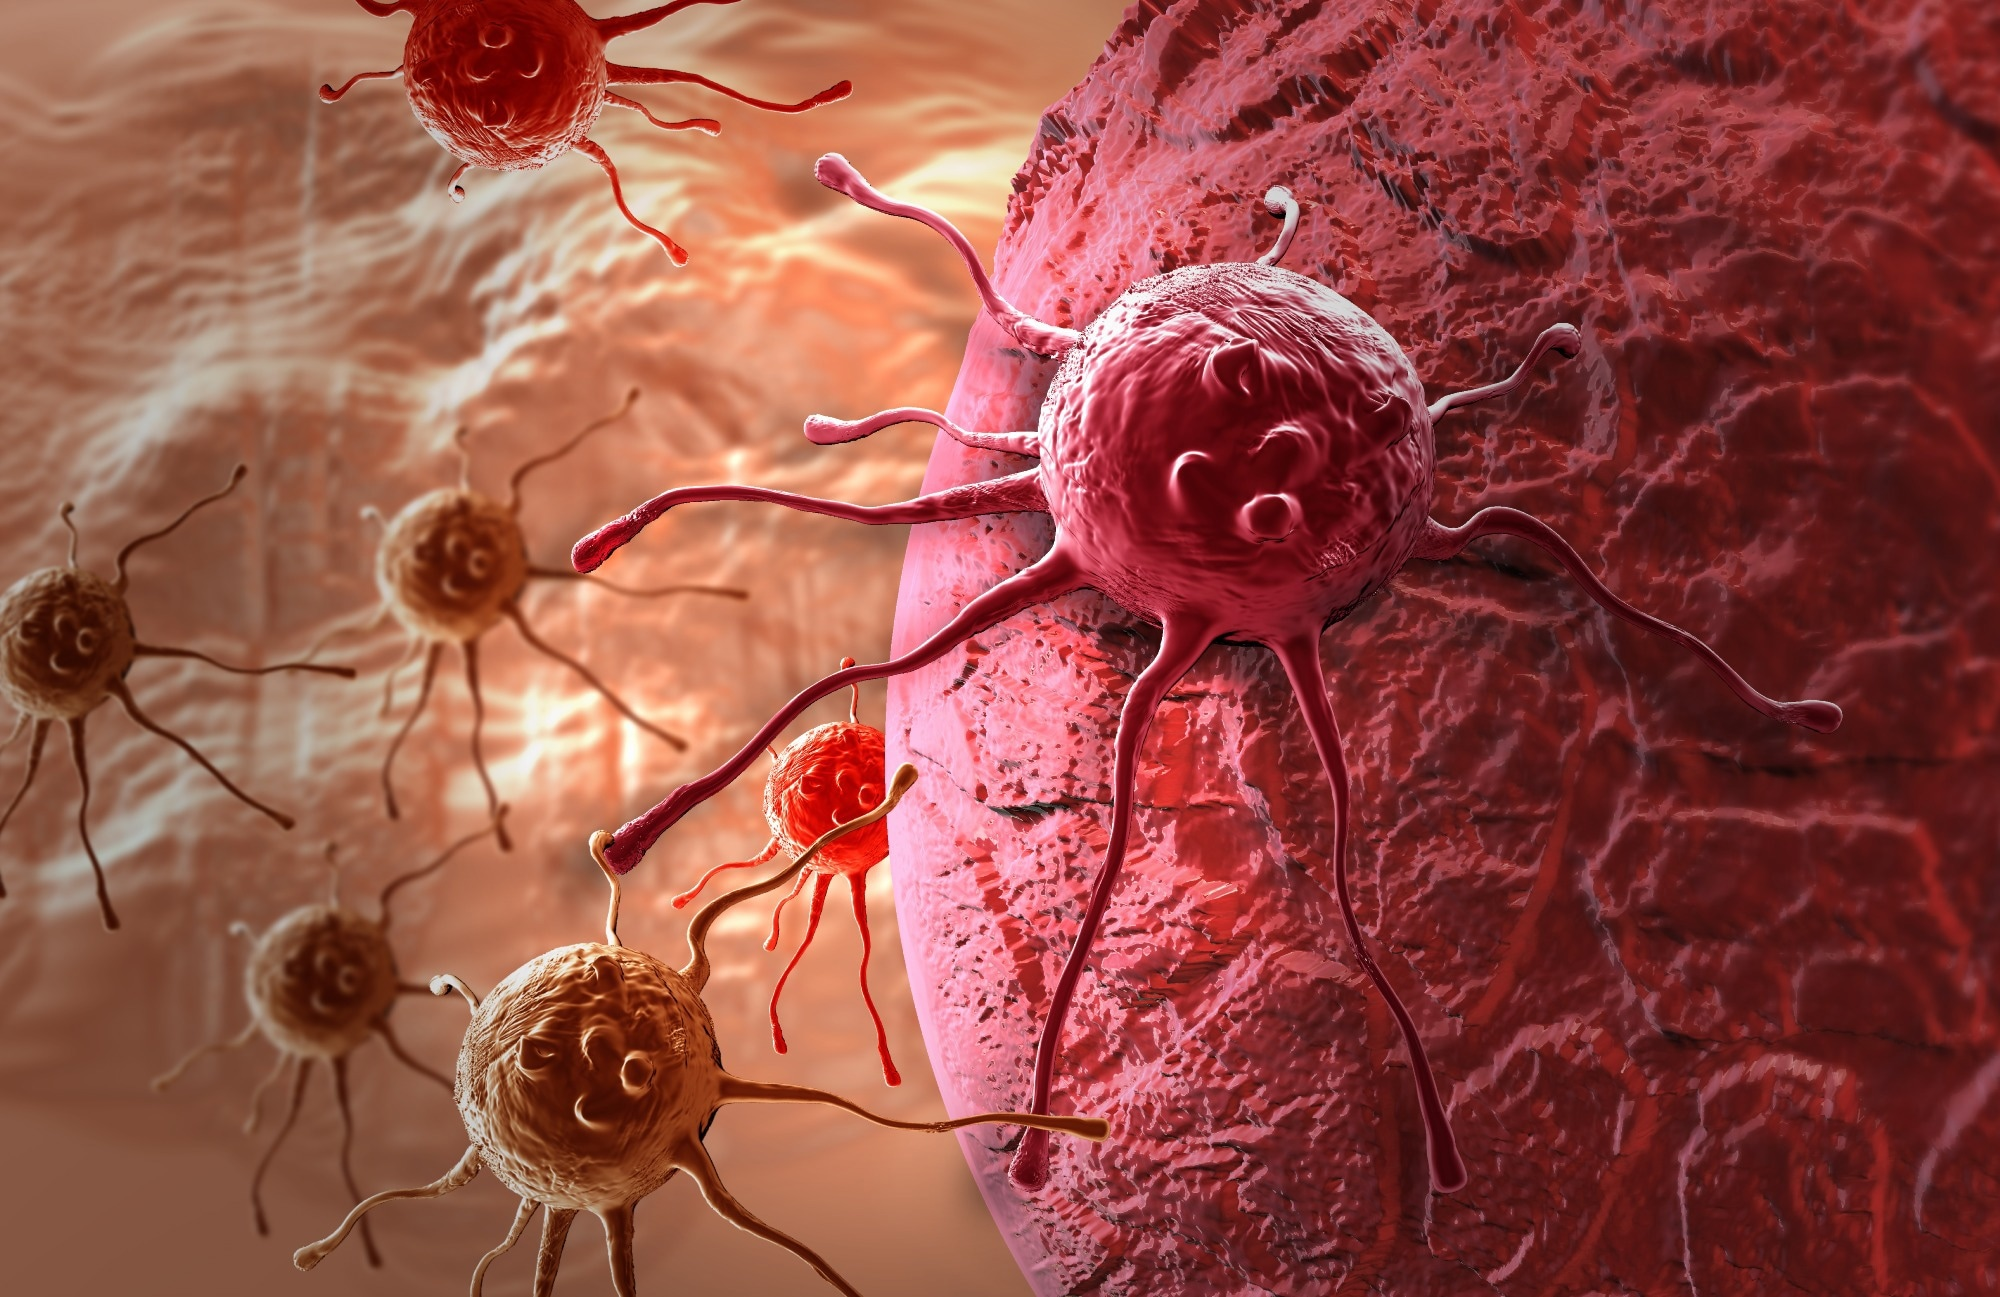

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cancer-data/Cancer_Data.csv


## Creating Dataframe form CSV

In [2]:
pd.set_option('display.max_columns',None)
df = pd.read_csv("/kaggle/input/cancer-data/Cancer_Data.csv")
df.sample(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
536,91979701,M,14.27,22.55,93.77,629.8,0.10380,0.11540,0.146300,0.061390,0.1926,0.05982,0.2027,1.8510,1.895,18.54,0.006113,0.025830,0.04645,0.01276,0.01451,0.003756,15.29,34.27,104.30,728.3,0.1380,0.27330,0.42340,0.13620,0.2698,0.08351,NaN
315,894089,B,12.49,16.85,79.19,481.6,0.08511,0.03834,0.004473,0.006423,0.1215,0.05673,0.1716,0.7151,1.047,12.69,0.004928,0.003012,0.00262,0.00339,0.01393,0.001344,13.34,19.71,84.48,544.2,0.1104,0.04953,0.01938,0.02784,0.1917,0.06174,NaN
516,916799,M,18.31,20.58,120.80,1052.0,0.10680,0.12480,0.156900,0.094510,0.1860,0.05941,0.5449,0.9225,3.218,67.36,0.006176,0.018770,0.02913,0.01046,0.01559,0.002725,21.86,26.20,142.20,1493.0,0.1492,0.25360,0.37590,0.15100,0.3074,0.07863,NaN


## Basic pre analysis
* `Shape` <br>
* `Information` <br>
* `Null values` <br>
* `Droping columns`

In [3]:
# look at shape
df.shape

(569, 33)

In [4]:
# look at information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
 # look at null values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
len(df['id'].unique()) # no linearity need to remove this column

569

In [7]:
# dropping columns
df1 = df.drop(["id","Unnamed: 32"],axis = 'columns')
df1.shape

(569, 31)

## Data Processing

In [8]:
df1.sample(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
308,B,13.50,12.71,85.69,566.2,0.07376,0.03614,0.002758,0.004419,0.1365,0.05335,0.2244,0.6864,1.509,20.39,0.003338,0.003746,0.00203,0.003242,0.01480,0.001566,14.97,16.94,95.48,698.7,0.09023,0.05836,0.01379,0.0221,0.2267,0.06192
108,M,22.27,19.67,152.80,1509.0,0.13260,0.27680,0.426400,0.182300,0.2556,0.07039,1.2150,1.5450,10.050,170.00,0.006515,0.086680,0.10400,0.024800,0.03112,0.005037,28.40,28.01,206.80,2360.0,0.17010,0.69970,0.96080,0.2910,0.4055,0.09789
450,B,11.87,21.54,76.83,432.0,0.06613,0.10640,0.087770,0.023860,0.1349,0.06612,0.2560,1.5540,1.955,20.24,0.006854,0.060630,0.06663,0.015530,0.02354,0.008925,12.79,28.18,83.51,507.2,0.09457,0.33990,0.32180,0.0875,0.2305,0.09952


## ---> target column
#### Cancer Types:
* `Benign cancer` (B) -- > cancer at normal stage <br>
* `Malignant cancer` (M) ---> cancer very dangerous <br>
#### Process follwed:
* `Unique values`
* `Label Encoding`


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
# Unique values
df1['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [11]:
# label encoding
encoder = LabelEncoder()
df1['diagnosis'] = encoder.fit_transform(df1['diagnosis'])
df1.sample(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
21,0,9.504,12.44,60.34,273.9,0.1024,0.06492,0.02956,0.02076,0.1815,0.06905,0.2773,0.9768,1.909,15.70,0.009606,0.01432,0.01985,0.01421,0.02027,0.002968,10.23,15.66,65.13,314.9,0.1324,0.1148,0.08867,0.06227,0.2450,0.07773
392,1,15.490,19.97,102.40,744.7,0.1160,0.15620,0.18910,0.09113,0.1929,0.06744,0.6470,1.3310,4.675,66.91,0.007269,0.02928,0.04972,0.01639,0.01852,0.004232,21.20,29.41,142.10,1359.0,0.1681,0.3913,0.55530,0.21210,0.3187,0.10190


## ---> input columns
#### Data type:
* `Numerical form` *float* <br>
#### Process followed:
* `Data analysis`
* `Feature Engineering`
    * Feature extraction for one column example purpose to understand how to do it.

In [12]:
import matplotlib.pyplot as plt

In [13]:
df_x = df1.drop('diagnosis',axis='columns')
df_x.sample(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
220,13.65,13.16,87.88,568.9,0.09646,0.08711,0.03888,0.02563,0.1360,0.06344,0.2102,0.4336,1.391,17.40,0.004133,0.01695,0.01652,0.006659,0.01371,0.002735,15.34,16.35,99.71,706.2,0.1311,0.2474,0.1759,0.08056,0.2380,0.08718
121,18.66,17.12,121.40,1077.0,0.10540,0.11000,0.14570,0.08665,0.1966,0.06213,0.7128,1.5810,4.895,90.47,0.008102,0.02101,0.03342,0.016010,0.02045,0.004570,22.25,24.90,145.40,1549.0,0.1503,0.2291,0.3272,0.16740,0.2894,0.08456


## ---> Feature Engineering
#### Process followed:
* `Analysis of graph` <br>
* `Feature extraction`
 **Try to find out co-relation with each other at input data for one columns**
>It is difficult to plot all features vs all features, Because there are 30 columns means need to plot 30 * 30 - 30 = 870 graphs, so lets understand through one column vs all other how to do feature extraction.

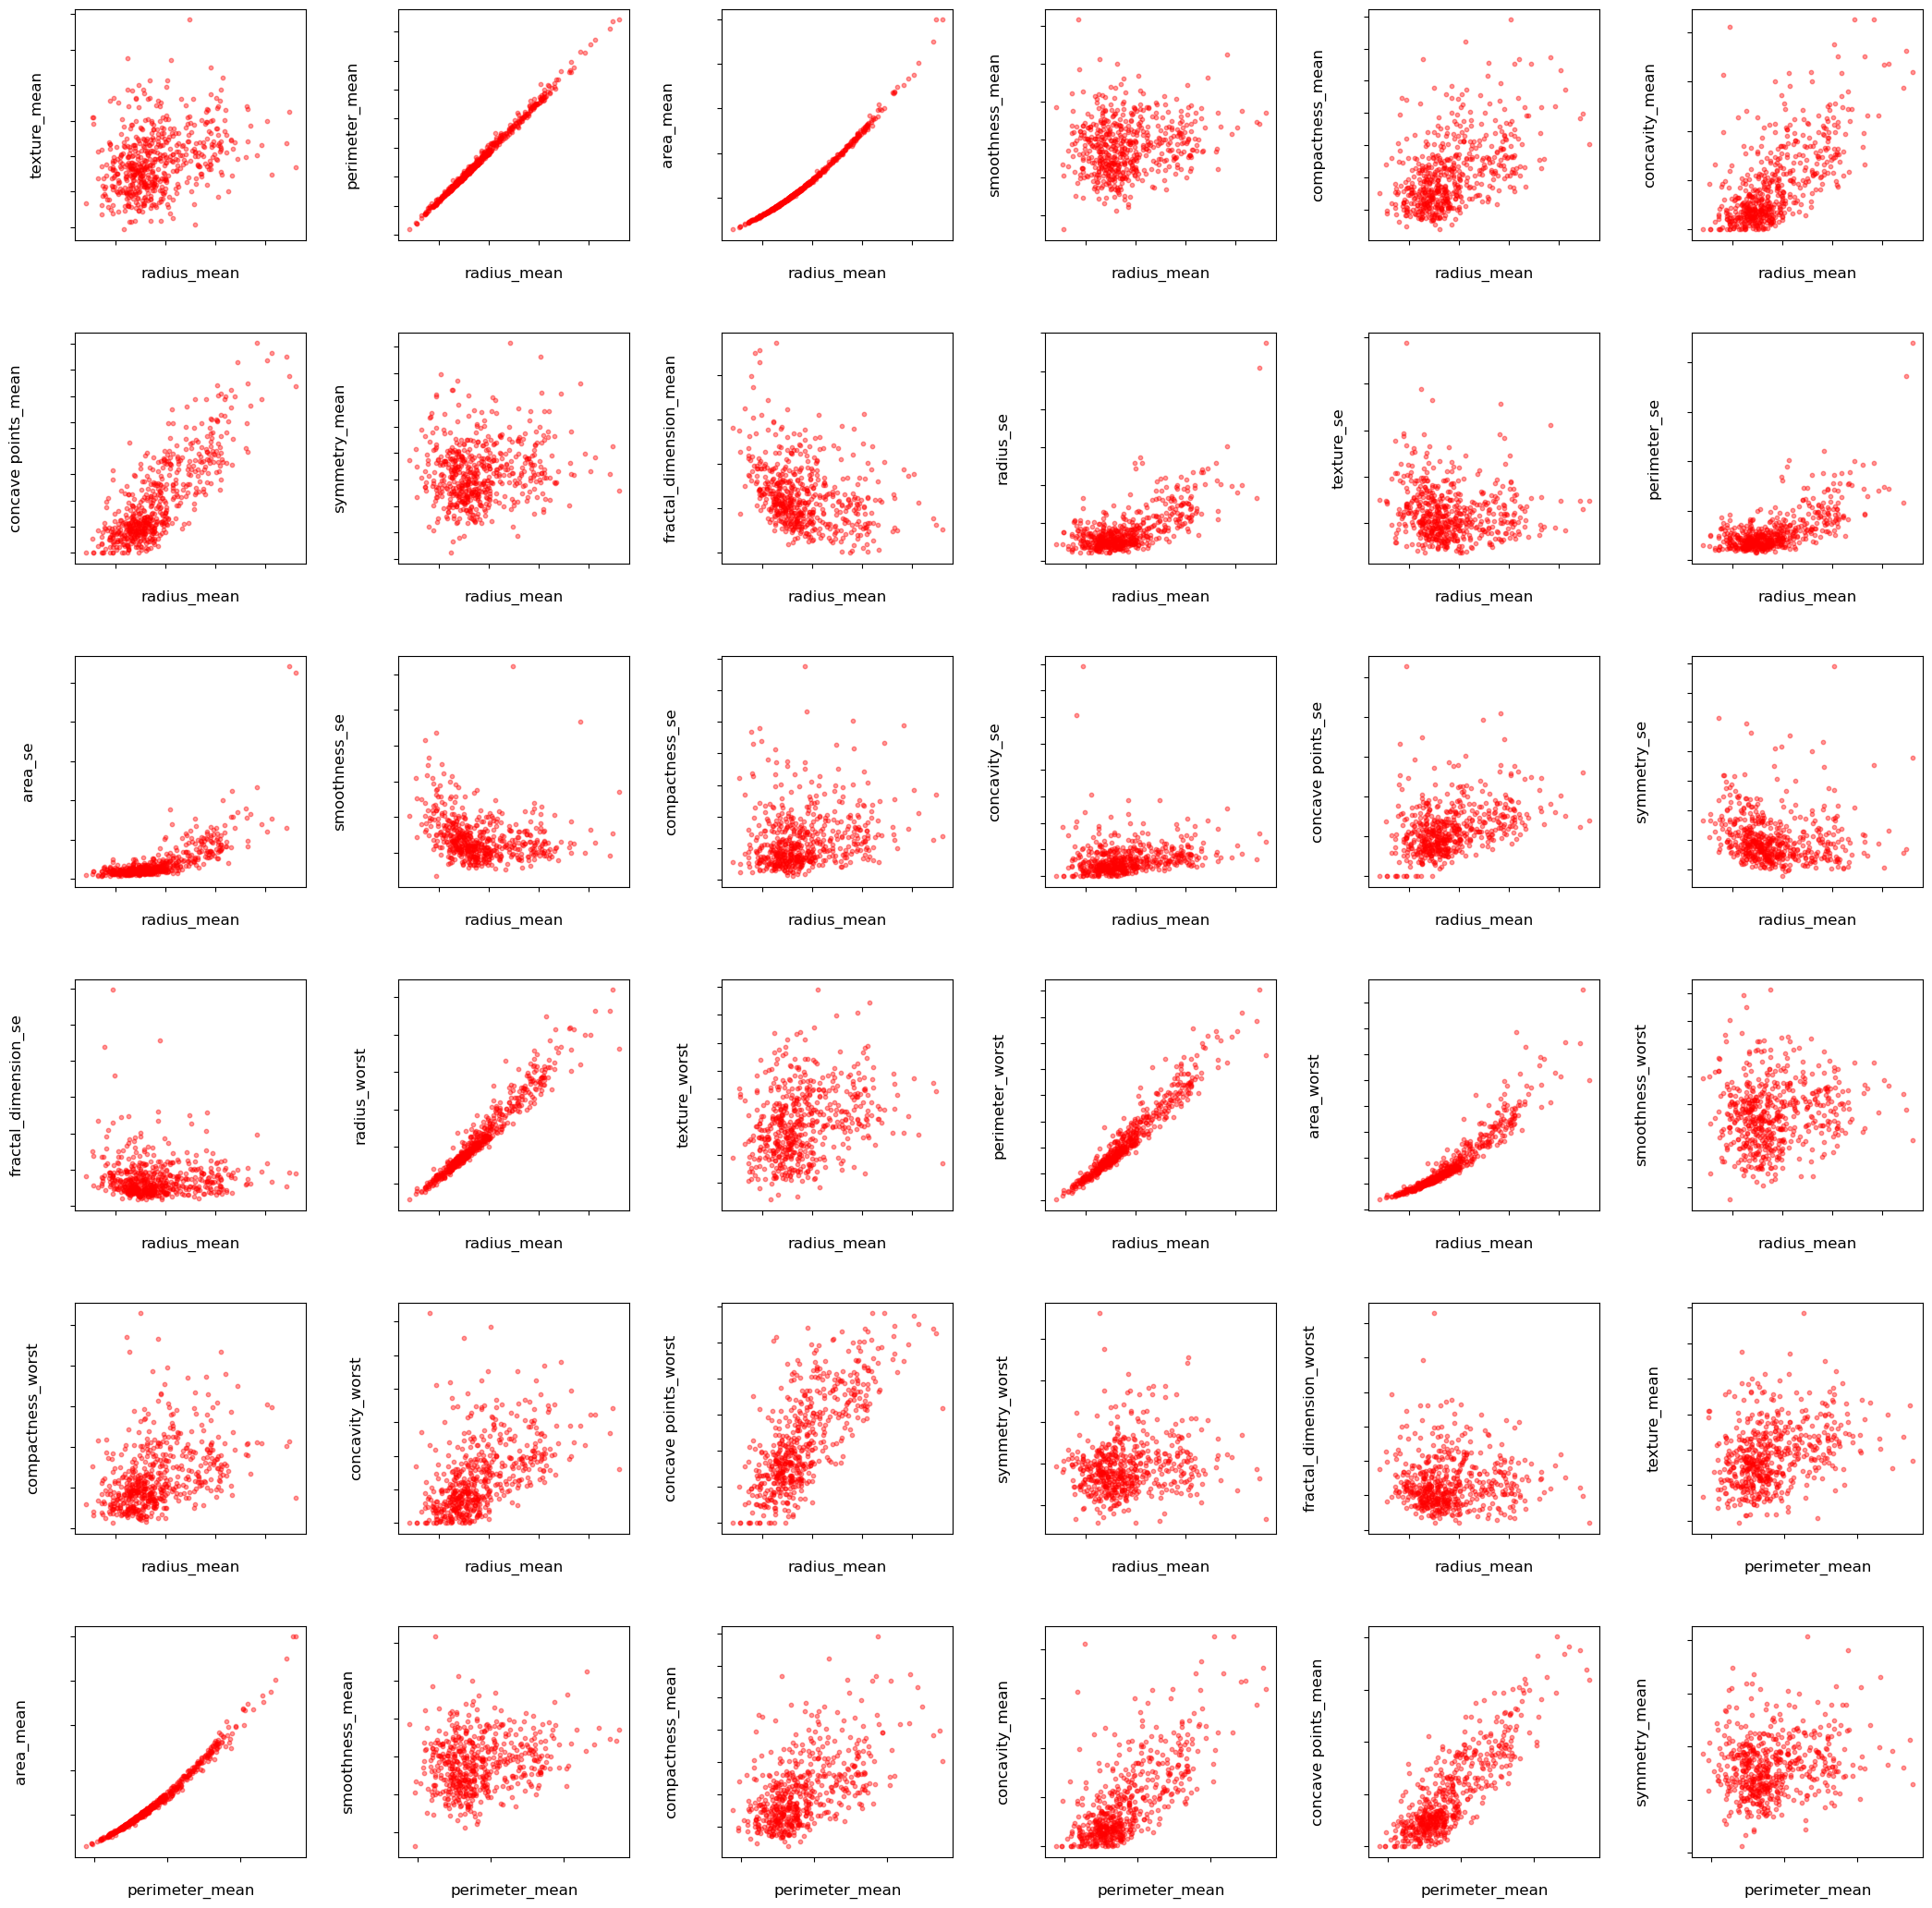

In [14]:
x_ax = 6
y_ax = 6
no = 1
exit = False
cols = list(df_x.columns)
plt.figure(figsize=(25,25))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)
for i,f1 in enumerate(cols):
    if exit:
        break
    temp = cols
    temp.pop(i)
    for j,f2 in enumerate(temp):
        if no > x_ax*y_ax:
            exit = True
            break
        plt.subplot(x_ax,y_ax,no)
        plt.scatter(df_x[f1],df_x[f2],s=10,c='red',alpha=0.4)
        plt.xticks(color='w')
        plt.yticks(color='w')
        plt.xlabel(f"{f1}",fontsize=12)
        plt.ylabel(f"{f2}",fontsize=12)
        no = no+1
    

Find linear graphs to make feature extraction

### ---> Feature extraction for one feature (radius mean)
>Feature extraction refers to finding co-relation between features and try to add them together to form new feature which containing full information of extracted features (there may be some loss)

In [15]:
df_x['perimeter_mean/radius_mean'] = df_x['perimeter_mean']/df_x['radius_mean']
df_x['area_mean/radius_mean'] = df_x['area_mean']/df_x['radius_mean']
df_x['radius_worst/radius_mean'] = df_x['radius_worst']/df_x['radius_mean']
df_x['perimeter_worst/radius_mean'] = df_x['perimeter_worst']/df_x['radius_mean']

In [16]:
# Remove columns after feature extraction, extracted columns
cols_extracted_drop = ['perimeter_mean','radius_mean','area_mean','radius_worst','perimeter_worst']
df_extracted = df_x.drop(cols_extracted_drop,axis='columns')

In [17]:
df_extracted.sample(3)

,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,perimeter_mean/radius_mean,area_mean/radius_mean,radius_worst/radius_mean,perimeter_worst/radius_mean
557,27.88,0.08123,0.04971,0.00000,0.00000,0.1742,0.06059,0.5375,2.9270,3.618,29.110,0.011590,0.011240,0.000000,0.000000,0.03004,0.003324,34.24,330.6,0.1073,0.07158,0.0000,0.00000,0.2475,0.06969,6.288868,28.791255,1.113234,7.057200
428,16.62,0.08151,0.03834,0.01369,0.01370,0.1511,0.06148,0.1415,0.9671,0.968,9.704,0.005883,0.006263,0.009398,0.006189,0.02009,0.002377,20.29,421.1,0.1030,0.06219,0.0458,0.04044,0.2383,0.07083,6.331536,34.240791,1.049416,6.680144
244,23.50,0.10270,0.15580,0.20490,0.08886,0.1978,0.06000,0.5243,1.8020,4.037,60.410,0.010610,0.032520,0.039150,0.015590,0.02186,0.003949,30.53,1417.0,0.1463,0.29680,0.3458,0.15640,0.2920,0.07614,6.654639,59.536082,1.115979,7.469072


> Result **after feature extraction,** there should not be co-relation between columns after extracting features, let's look at following graph now.

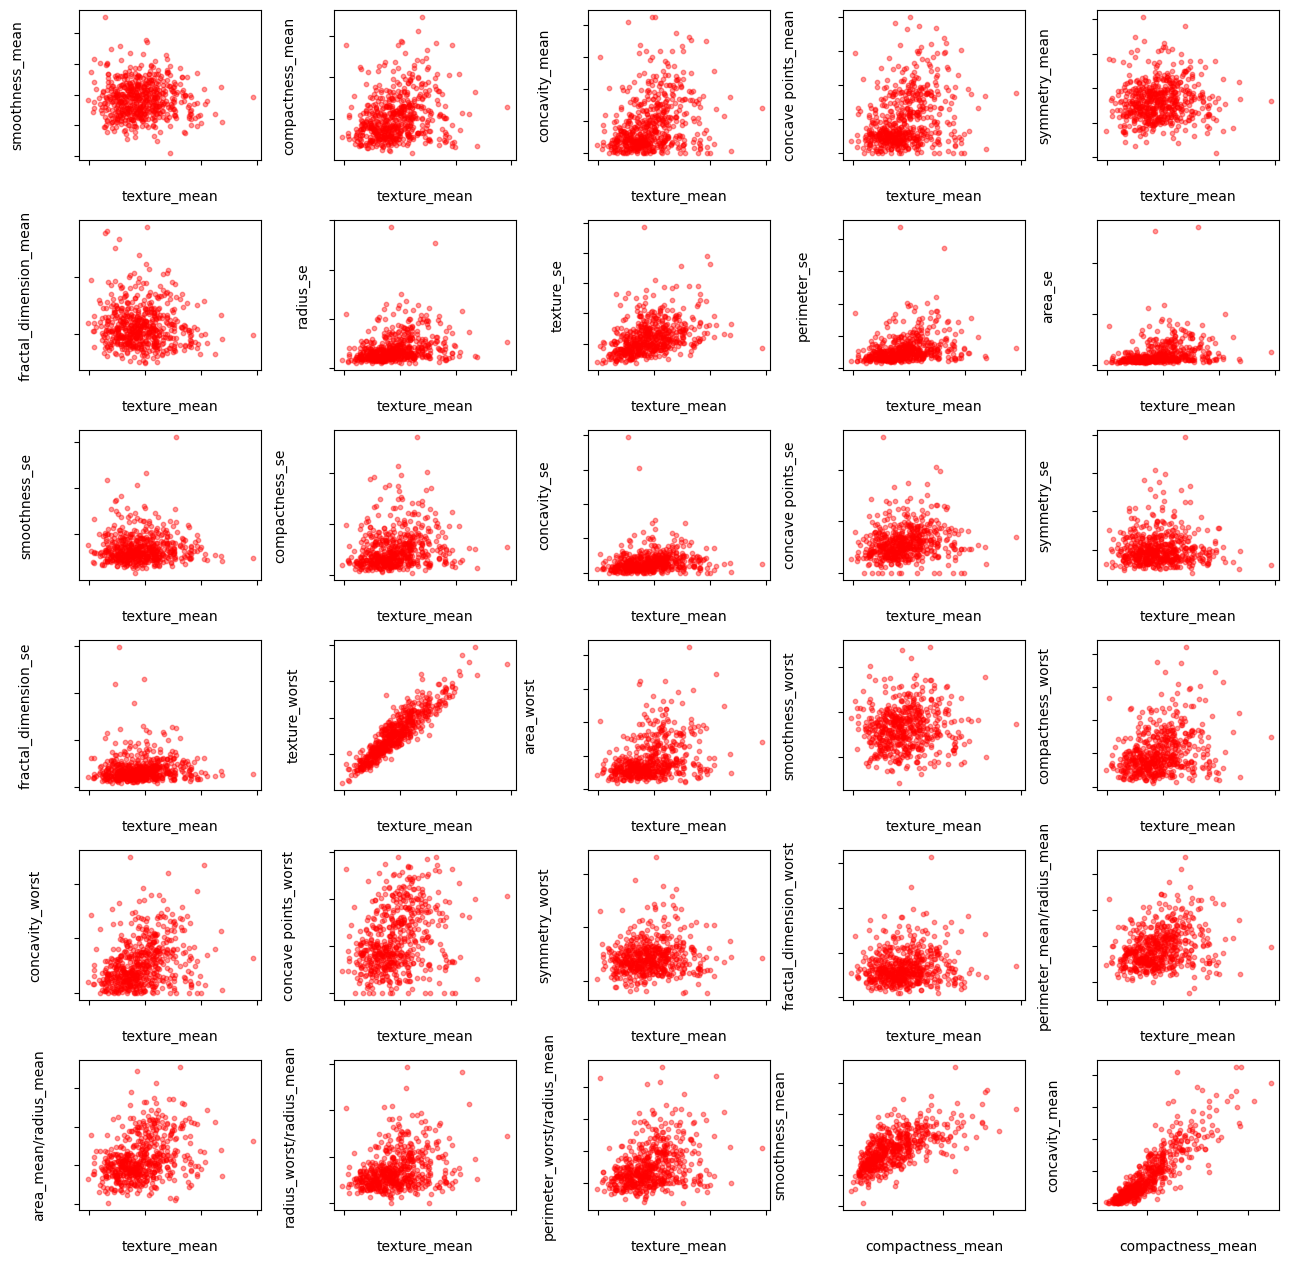

In [18]:
x_ax = 6
y_ax = 5
no = 1
exit = False
cols = list(df_extracted.columns)
plt.figure(figsize=(15,15))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
for i,f1 in enumerate(cols):
    if exit:
        break
    temp = cols
    temp.pop(i)
    for j,f2 in enumerate(temp):
        if no > x_ax*y_ax:
            exit = True
            break
        plt.subplot(x_ax,y_ax,no)
        plt.scatter(df_extracted[f1],df_extracted[f2],s=10,c='red',alpha=0.4)
        plt.xticks(color='w')
        plt.yticks(color='w')
        plt.xlabel(f"{f1}")
        plt.ylabel(f"{f2}")
        no = no+1
    

> Now in above figure there is no much strong relation beteween features, now we can move forward now at our goal to build best model.

### ---> Preparing dataframe for model training

In [19]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore',message='')

In [20]:
X = df_extracted
y = df['diagnosis']

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
X_train.shape,X_test.shape

((455, 29), (114, 29))

## Model training
* `RandomForestClassifier` <br>
* `BaggingClassifier` <br>
* `DecisionTreeClassifier` <br>
* `SVC` <br>
* `LogisticRegression`

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [23]:
algos = [RandomForestClassifier(),BaggingClassifier(),DecisionTreeClassifier(),SVC(),LogisticRegression()]
for algo in algos:
    print(str(algo))
    cs = cross_val_score(algo,X,y)
    print("cross_val_score ",cs)
    print("average ",sum(cs)/len(cs))
    print('')

RandomForestClassifier()
cross_val_score  [0.95614035 0.95614035 0.99122807 0.95614035 0.97345133]
average  0.9666200900481291

BaggingClassifier()
cross_val_score  [0.9122807  0.95614035 0.96491228 0.94736842 0.95575221]
average  0.947290793355069

DecisionTreeClassifier()
cross_val_score  [0.93859649 0.95614035 0.95614035 0.90350877 0.9380531 ]
average  0.9384878124514827

SVC()
cross_val_score  [0.85964912 0.90350877 0.92982456 0.94736842 0.94690265]
average  0.9174507064120478

LogisticRegression()
cross_val_score  [0.92982456 0.92105263 0.97368421 0.93859649 0.9380531 ]
average  0.9402421984163949



In [24]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [25]:
model.score(X_train,y_train)

1.0

In [26]:
model.score(X_test,y_test)

0.9824561403508771

## Saving model

In [27]:
import joblib

In [28]:
joblib.dump(model,"Cancer Predictor")

['Cancer Predictor']